<a href="https://colab.research.google.com/github/HarshaEadara/Analysis-and-prediction-of-Employee-Attrition-using-Machine-learning-Algorithms/blob/main/Analysis_and_prediction_of_Employee_Attrition_using_Machine_learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Analysis and prediction of Employee Attrition using Machine learning Algorithms </center></h1>

In this project, we will analyse Employee Attrition using IBM Employee Attrition Data by perfoming Exploratory data analysis (EDA) and by using Supervised machine learning algorithms such as Linear regression, Random Forest and Gradient Boosting with hyperparameter boosing via GridSearchCV.

This project uses 'IBM HR Analytics Employee Attrition & Performance' data set downloaded form Kaggle

# Importing Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data = pd.read_csv("IBM-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
#Checking for Null values
missing_values = data.isnull().sum()
missing_values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
#Checking for constant data
unique_values = data.nunique()
unique_values

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
#Droping the columns 'EmployeeCount', 'Over18', 'StandardHours' and 'EmployeeNumber' since they have more unique values
columns_to_drop = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']
data = data.drop(columns=columns_to_drop)

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [11]:
#Chcking Attrition coloumn
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Exploratory Data Analysis

In [12]:
per = (data['Attrition'].value_counts()/len(data))*100
per

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

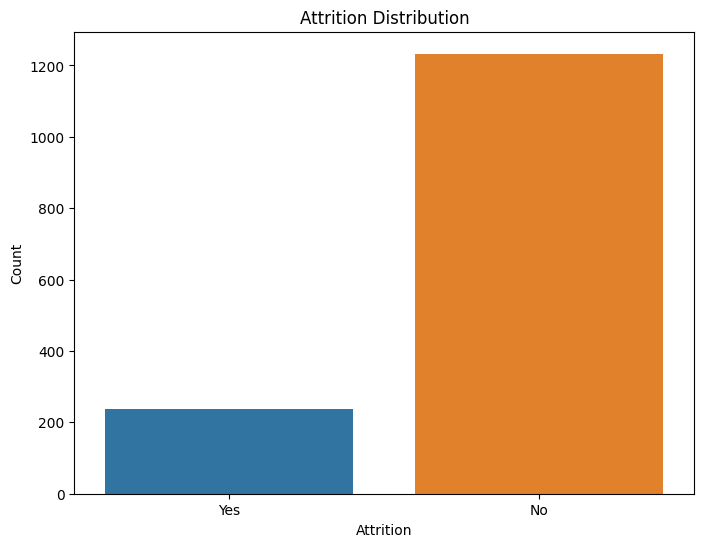

In [13]:
#Ploting Attrition data
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [14]:
#Select all categorical columns to piechart
cat_cols_pie = data.select_dtypes(['object']).columns
cat_cols_pie

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

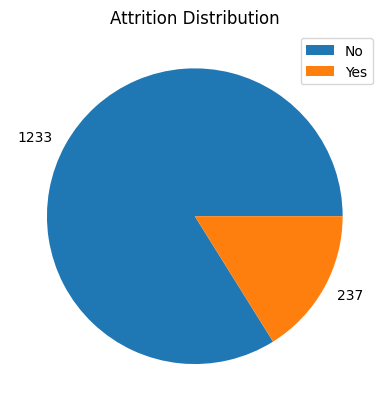

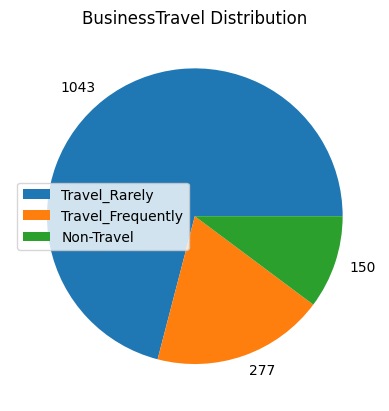

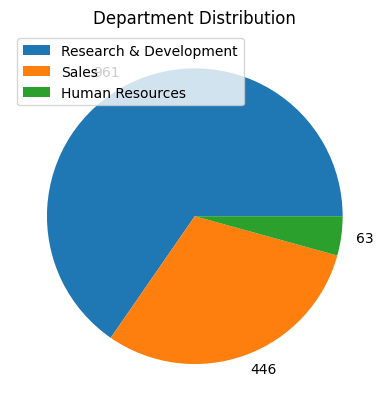

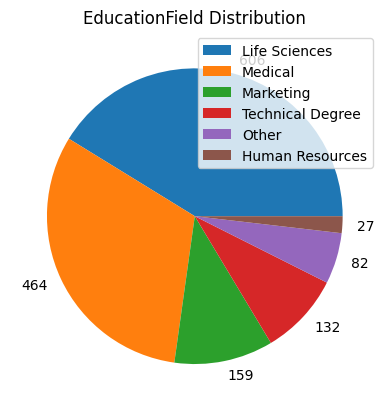

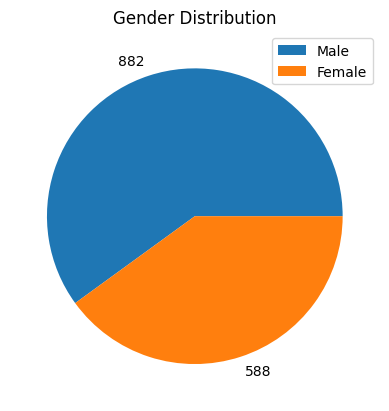

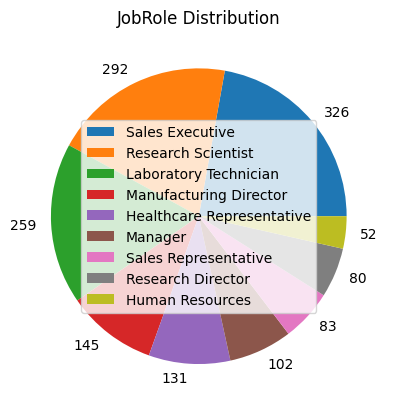

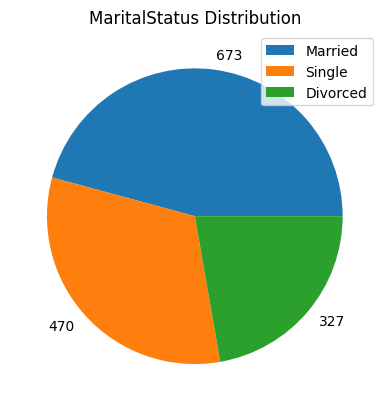

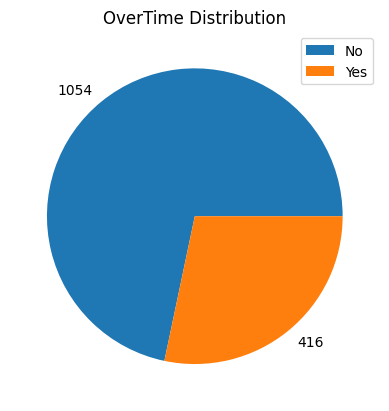

In [15]:
#Ploting the coloums for all employes
for col in cat_cols_pie:
    plt.pie(data[col].value_counts(), labels=data[col].value_counts().values)
    plt.title(col+" Distribution")
    plt.legend(data[col].value_counts().index)
    plt.show()

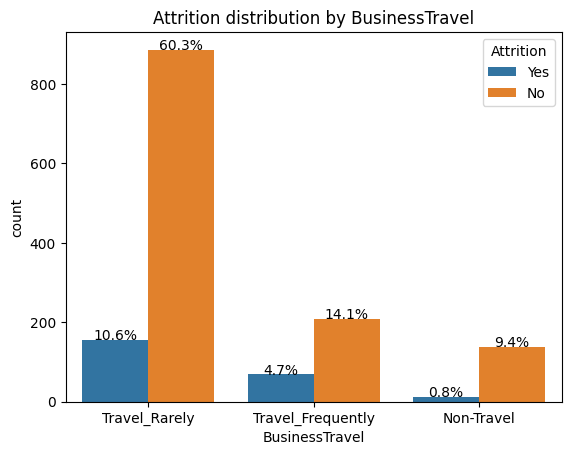

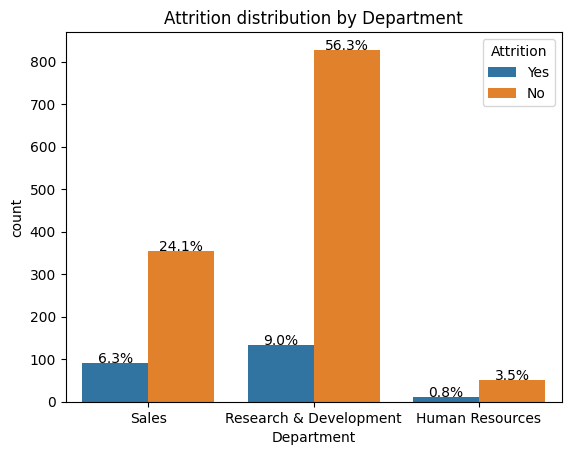

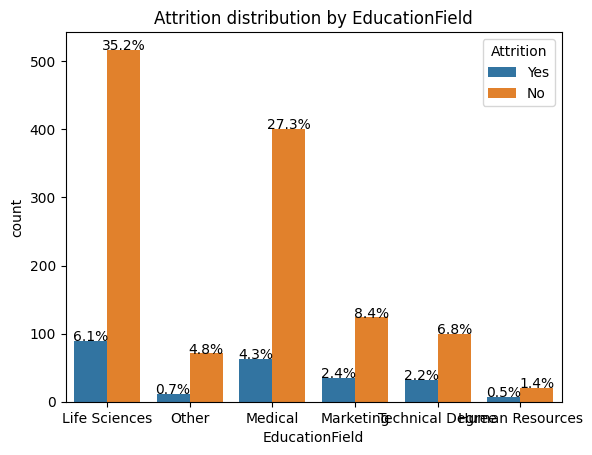

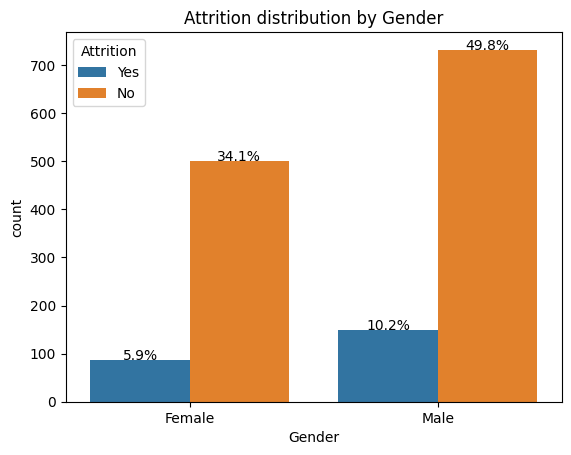

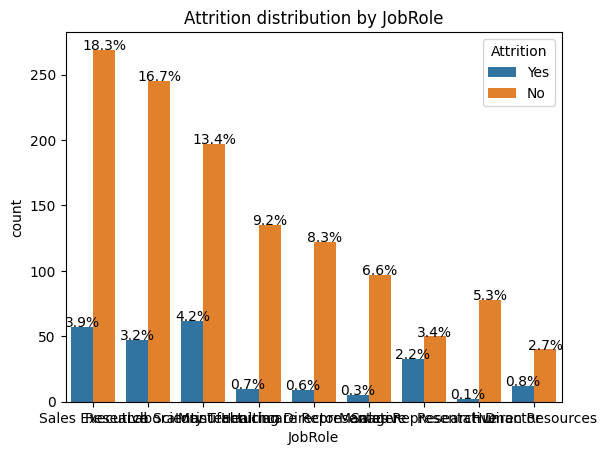

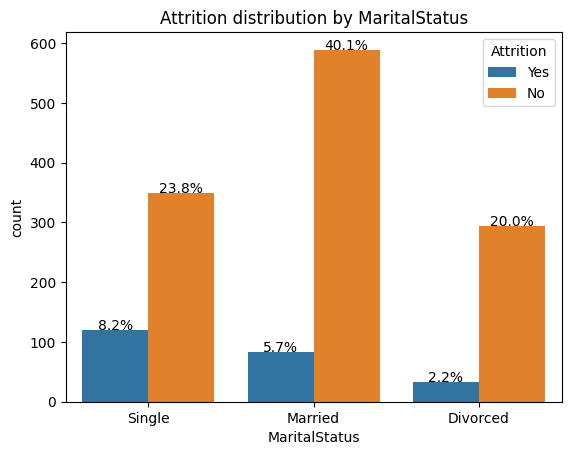

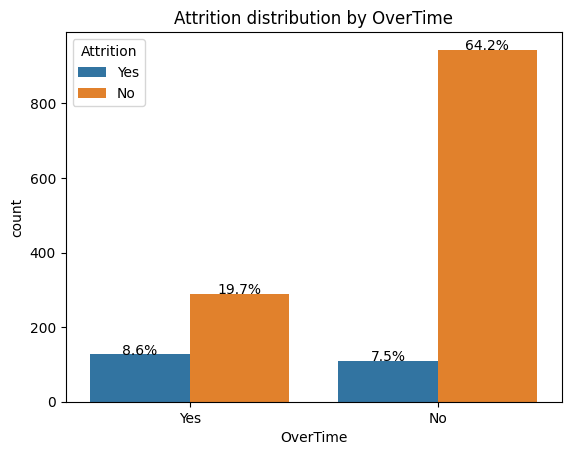

In [16]:
#selecting columns which are categorical except Attrition to graph against Attrition
cat_cols_pie_2 = data.drop('Attrition',axis=1).select_dtypes(['object']).columns
for col in cat_cols_pie_2:
    sns.countplot(x=col, hue='Attrition', data=data)
    plt.title("Attrition distribution by " + col)

    ax = plt.gca()
    total_height = len(data['Attrition'])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_height)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')

    plt.show()

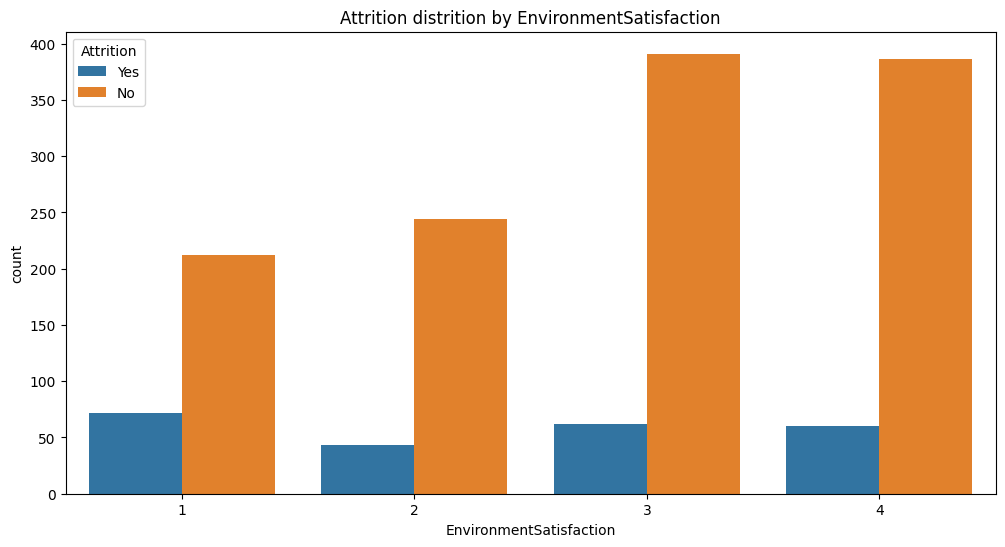

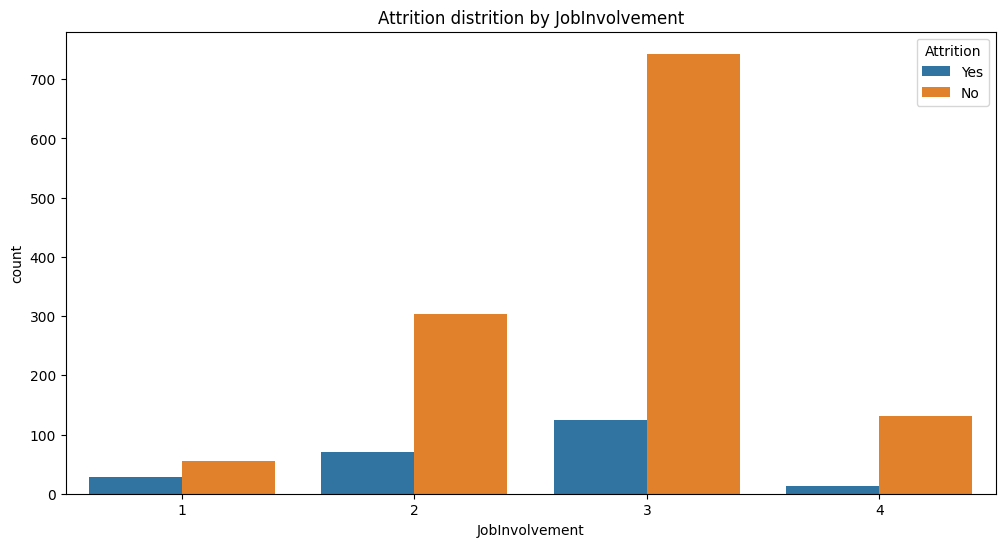

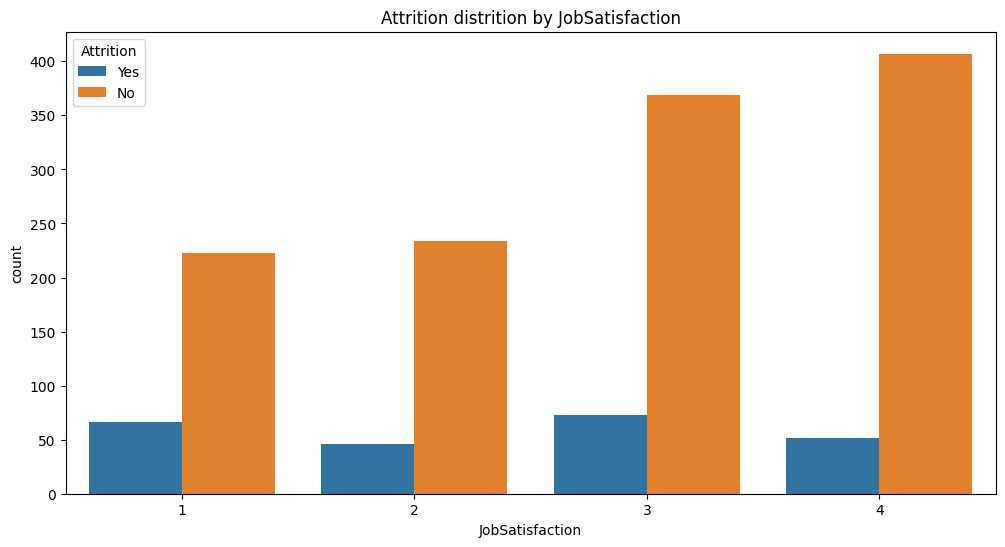

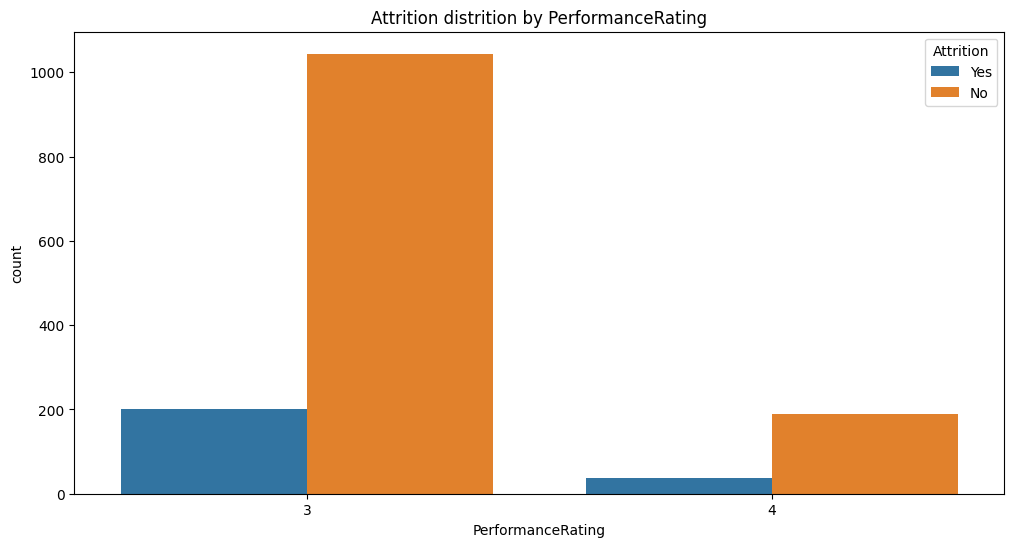

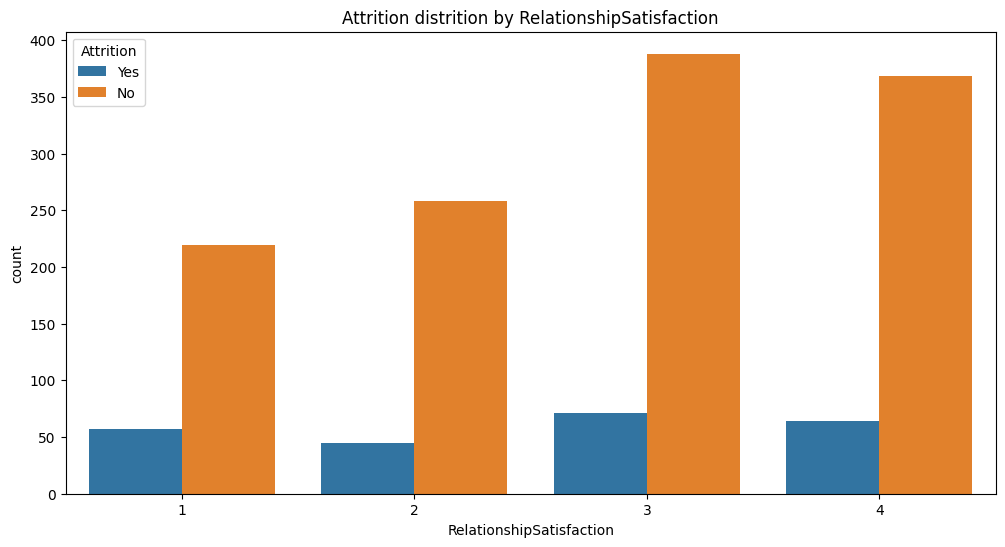

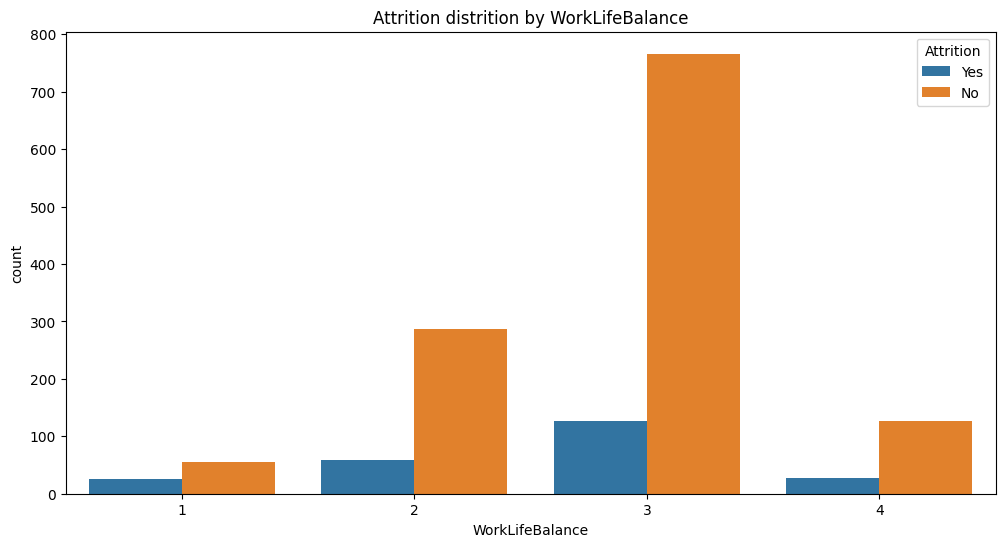

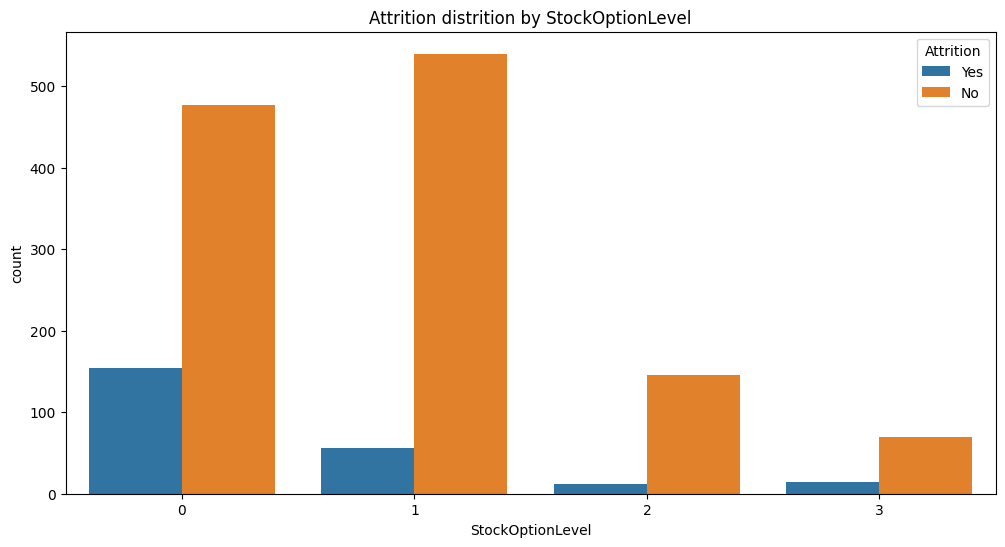

In [17]:
#selecting variables which are rating from surveying
rating_cols = ['EnvironmentSatisfaction','JobInvolvement', 'JobSatisfaction','PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance','StockOptionLevel']
for col in rating_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, hue='Attrition', data=data)
    plt.title("Attrition distrition by " + col)
    plt.show()

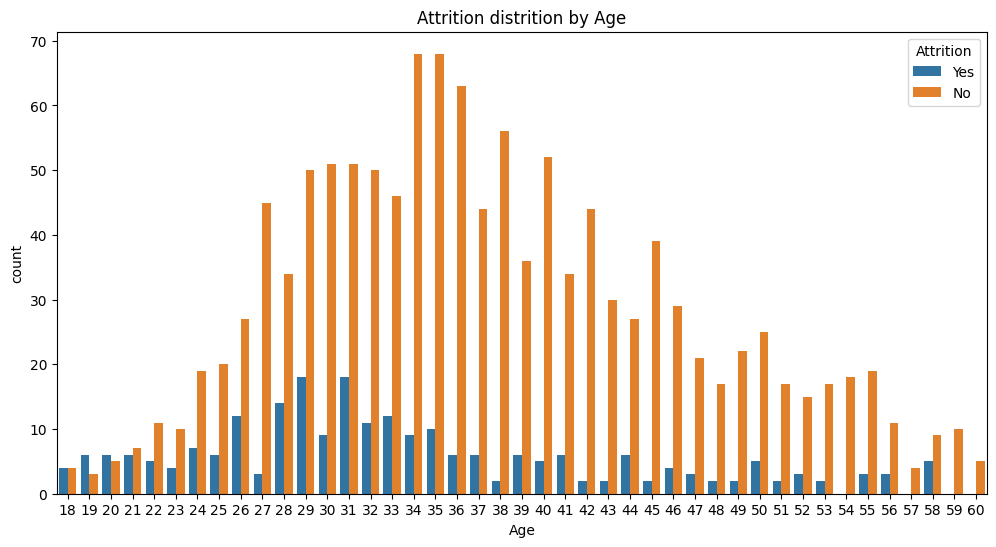

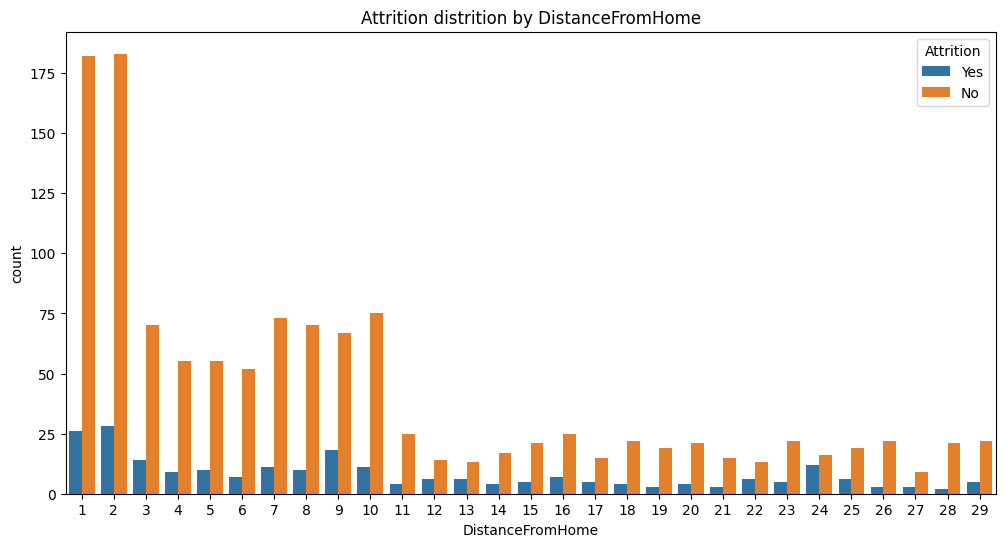

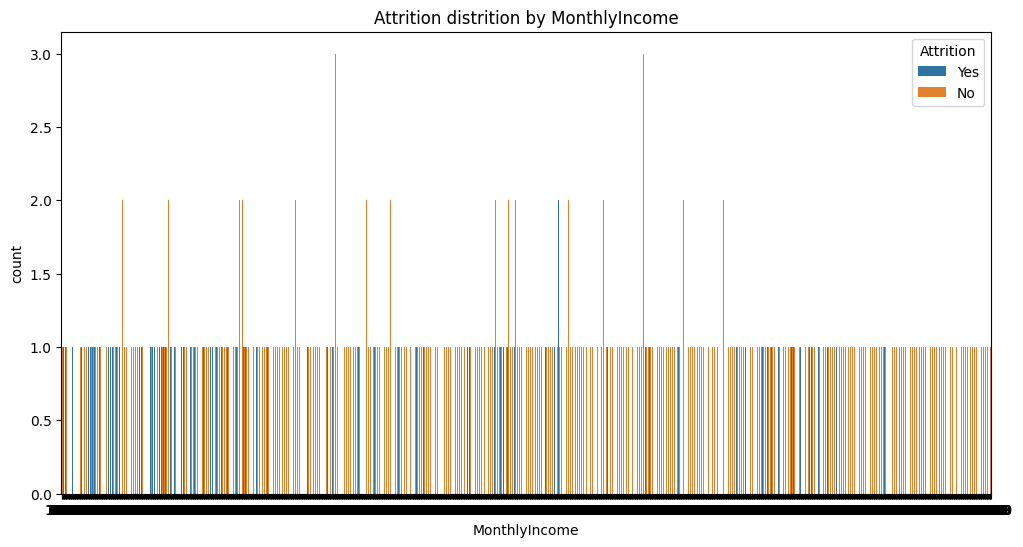

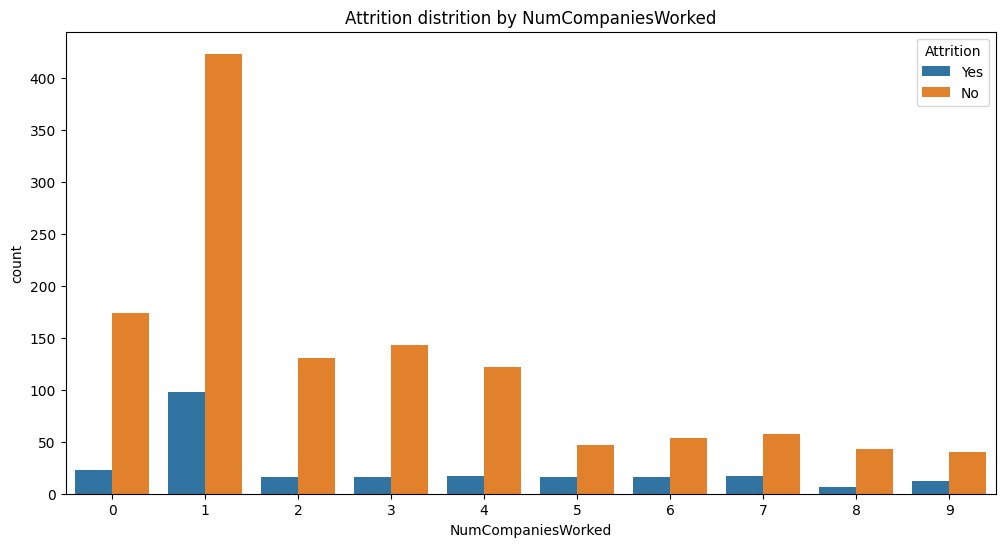

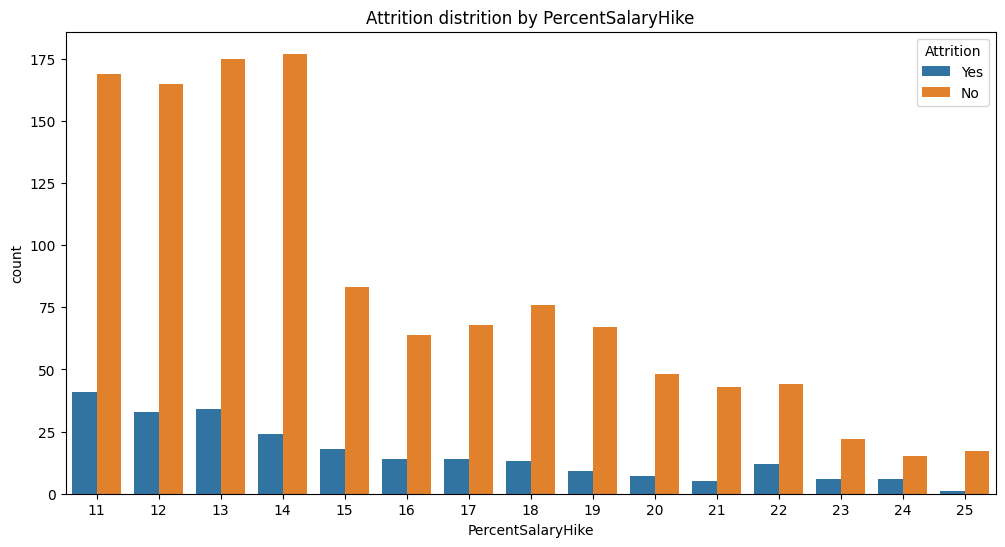

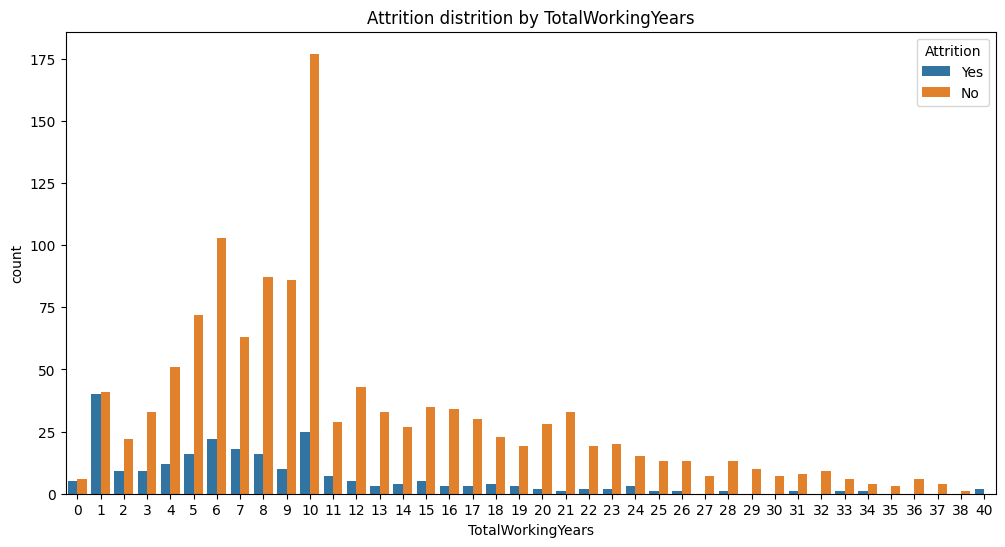

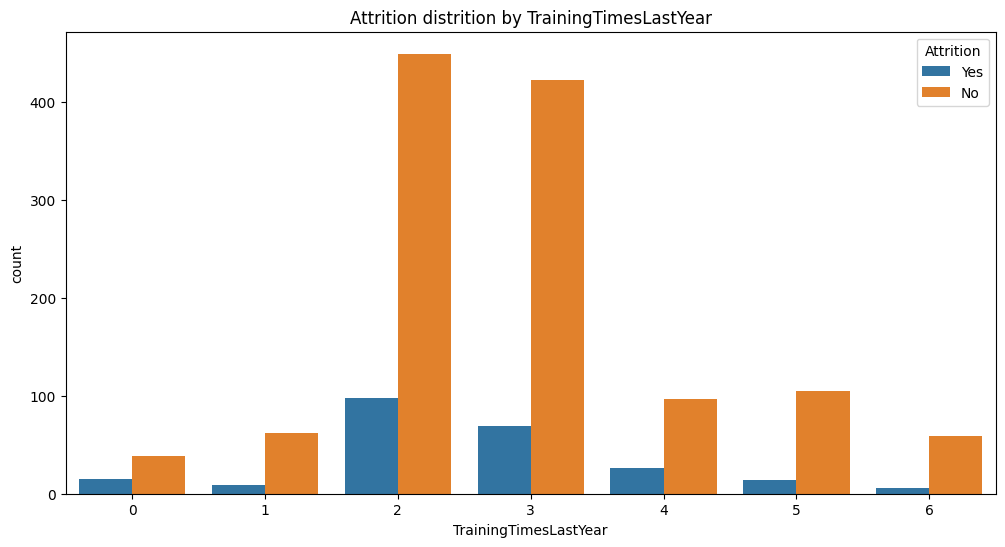

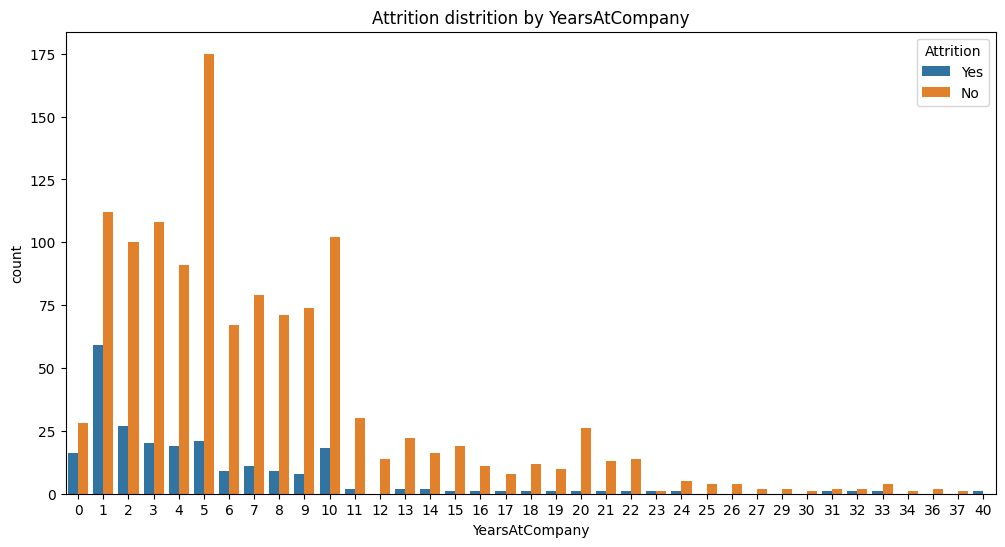

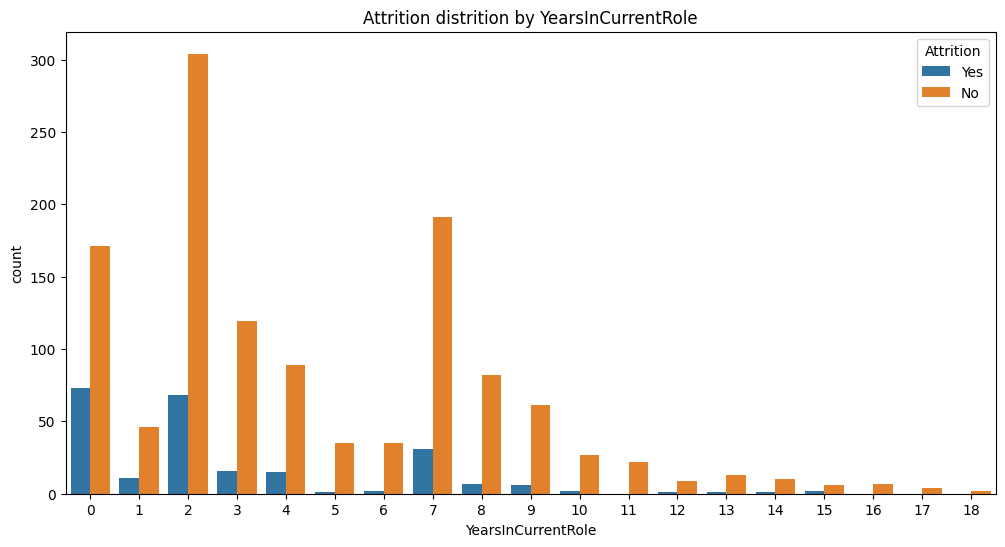

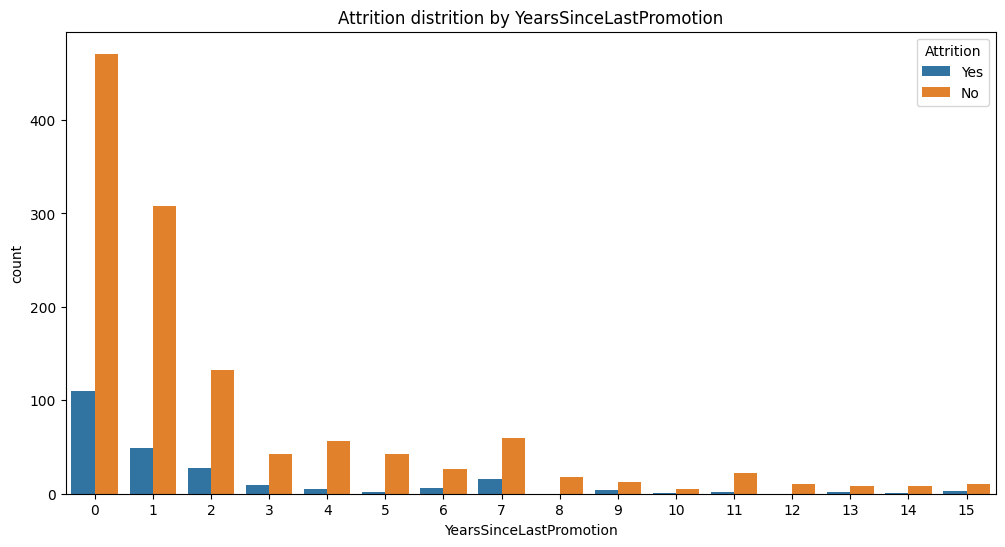

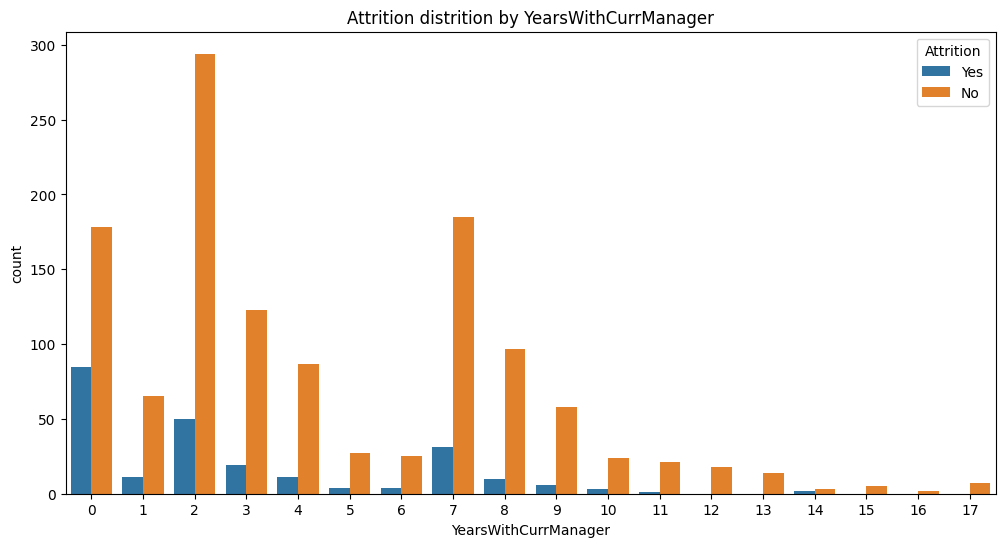

In [18]:
num_cols = ['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike','TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
for col in num_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(x=col, hue='Attrition', data=data)
    plt.title("Attrition distrition by " + col)
    plt.show()

In [19]:
#Creating key features
key_features = ['Age', 'MonthlyIncome', 'JobRole', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']
attrition_yes = data[data['Attrition'] == 'Yes']
attrition_no = data[data['Attrition'] == 'No']

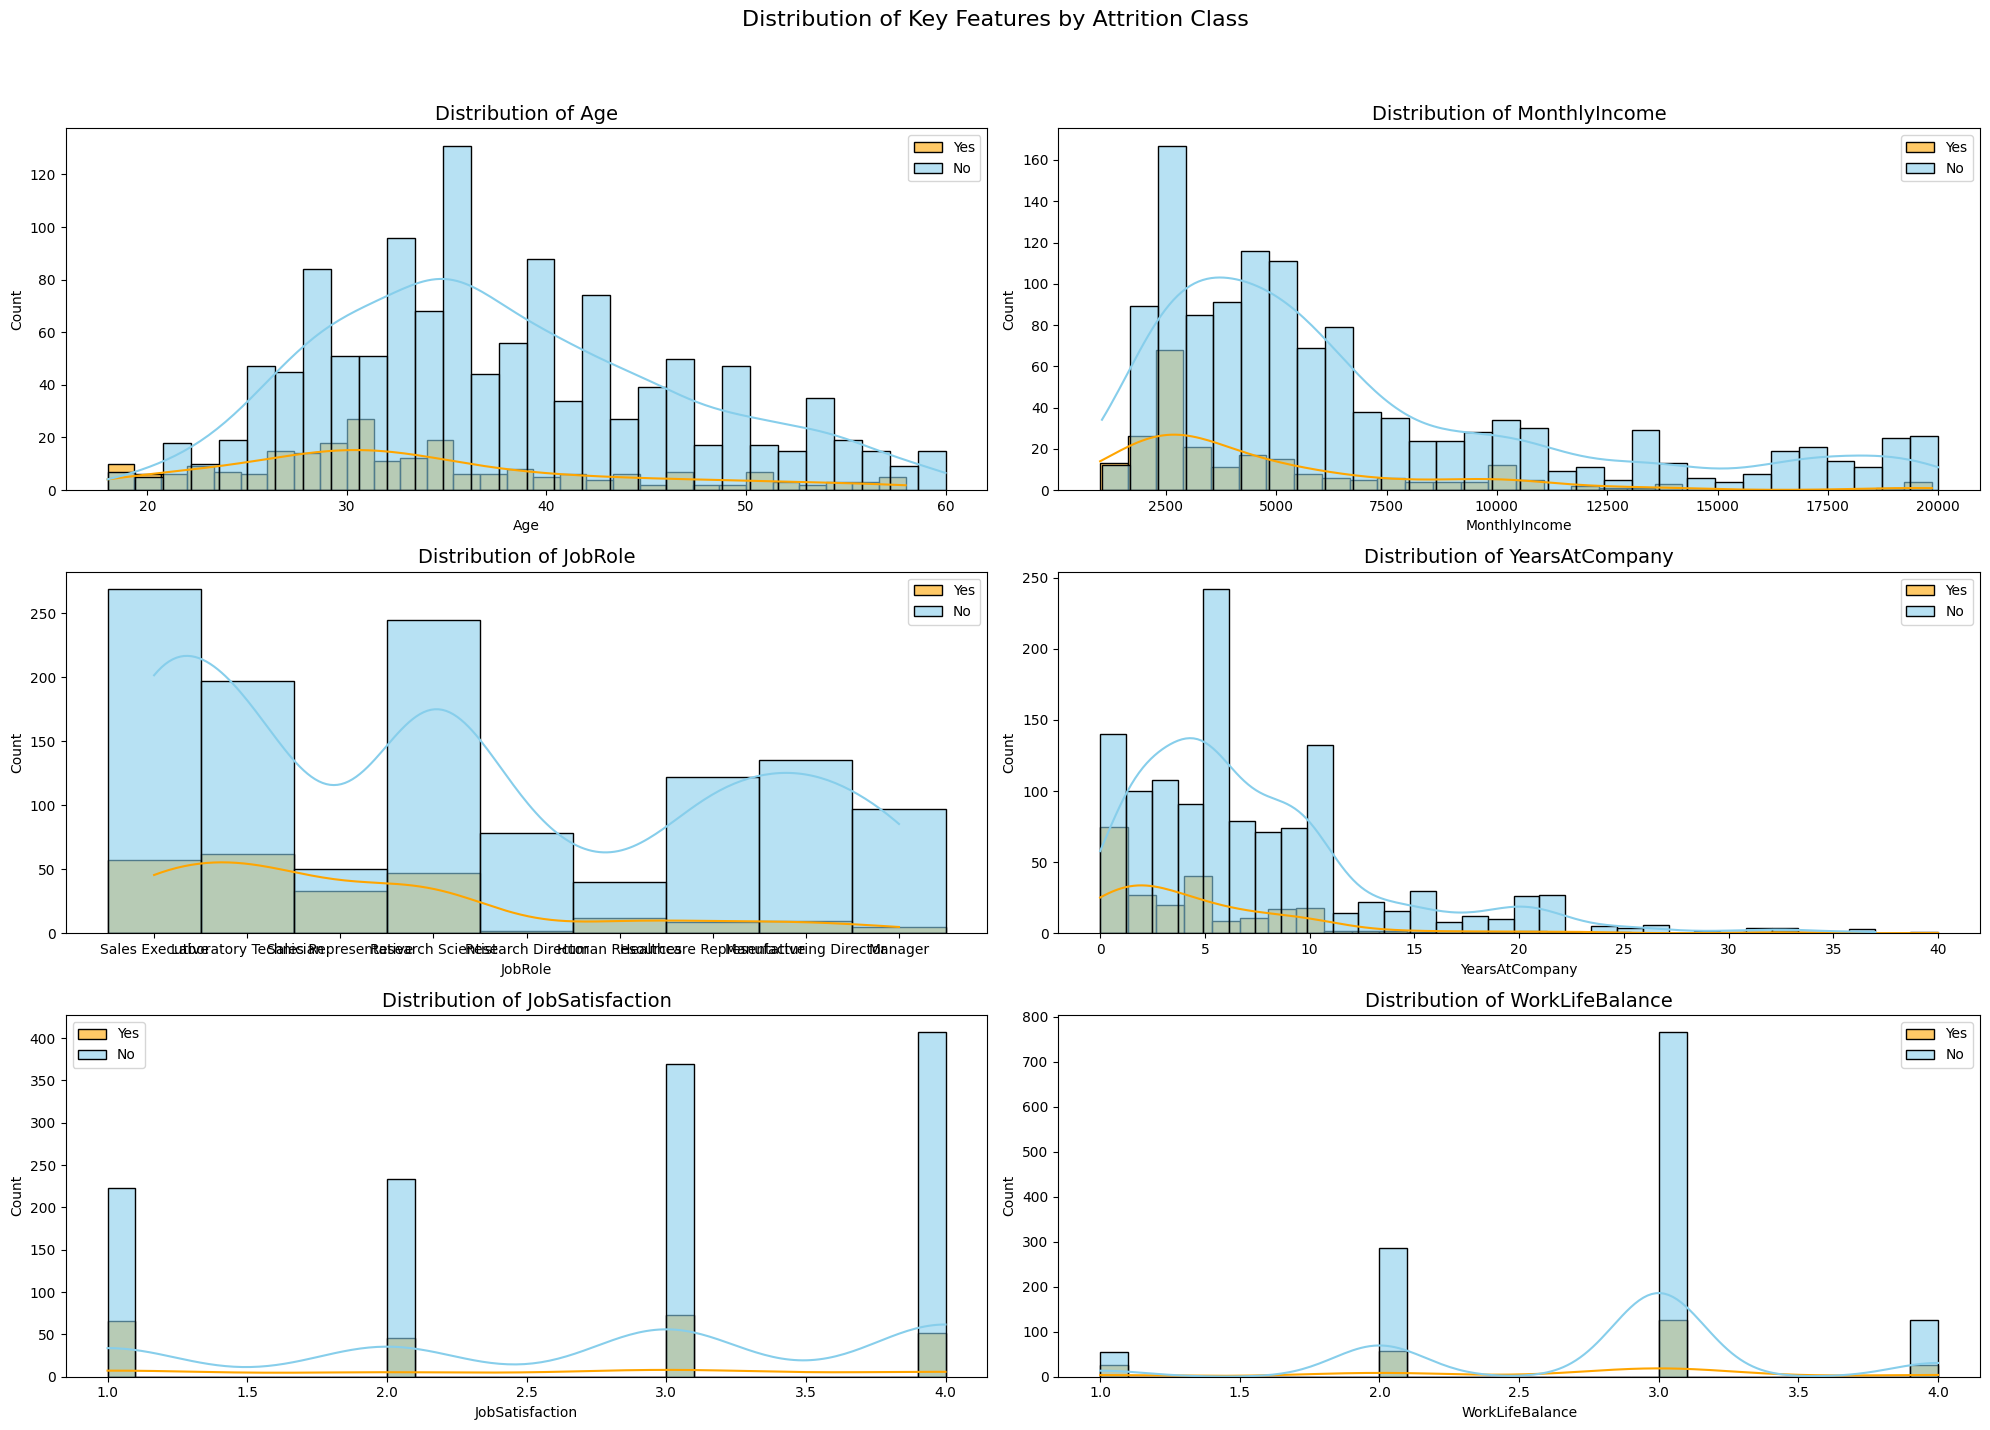

In [20]:
#Examining distribution
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle('Distribution of Key Features by Attrition Class', fontsize=16)
for ax, feature in zip(axes.ravel(), key_features):
    sns.histplot(attrition_yes[feature], bins=30, label='Yes', kde=True, color='orange', ax=ax, alpha=0.6)
    sns.histplot(attrition_no[feature], bins=30, label='No', kde=True, color='skyblue', ax=ax, alpha=0.6)

    ax.set_title(f'Distribution of {feature}', fontsize=14)
    ax.legend()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

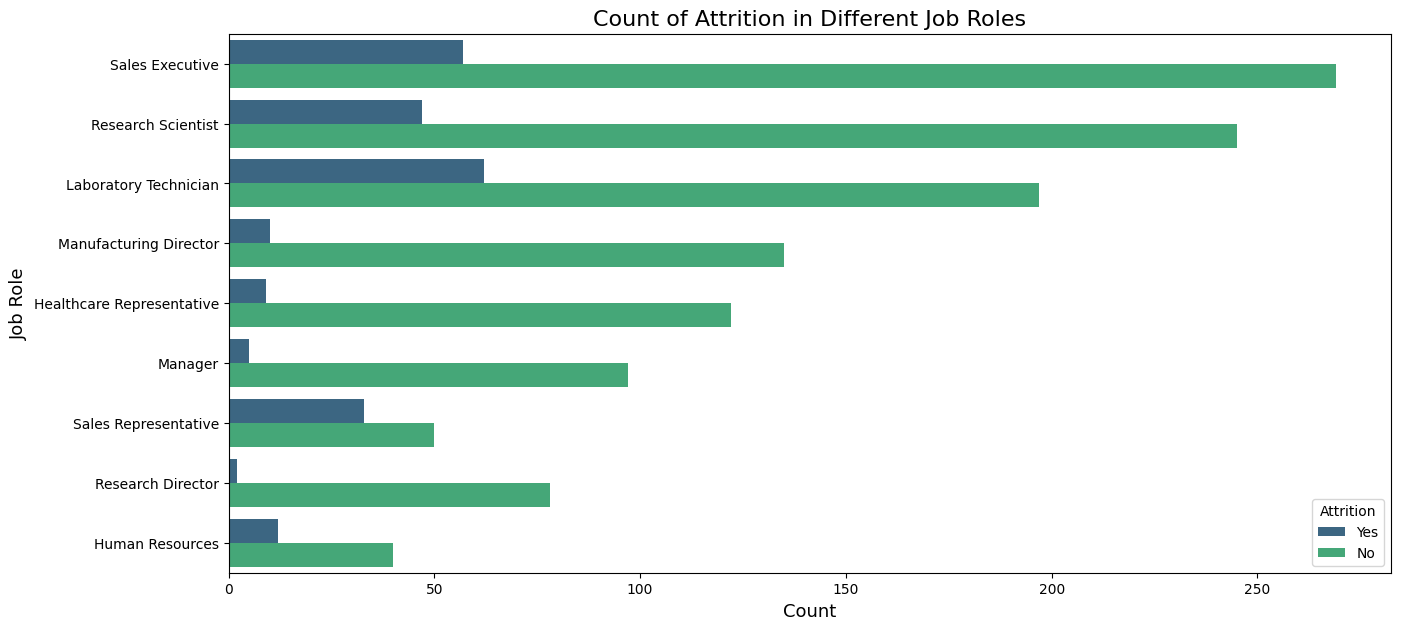

In [21]:
#adjusting for categorical data (countplot) to make better sense
plt.figure(figsize=(15, 7))
sns.countplot(data=data, y='JobRole', hue='Attrition', palette='viridis')
plt.title('Count of Attrition in Different Job Roles', fontsize=16)
plt.xlabel('Count', fontsize=13)
plt.ylabel('Job Role', fontsize=13)
plt.show()

In [22]:
#Craeting Features and target
X = data.drop(columns=['Attrition'])
y = data['Attrition']

In [23]:
#Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_cols = X.select_dtypes(include=[object]).columns.tolist()
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X = X.astype(int)
#Encode Attrition
y = LabelEncoder().fit_transform(y)

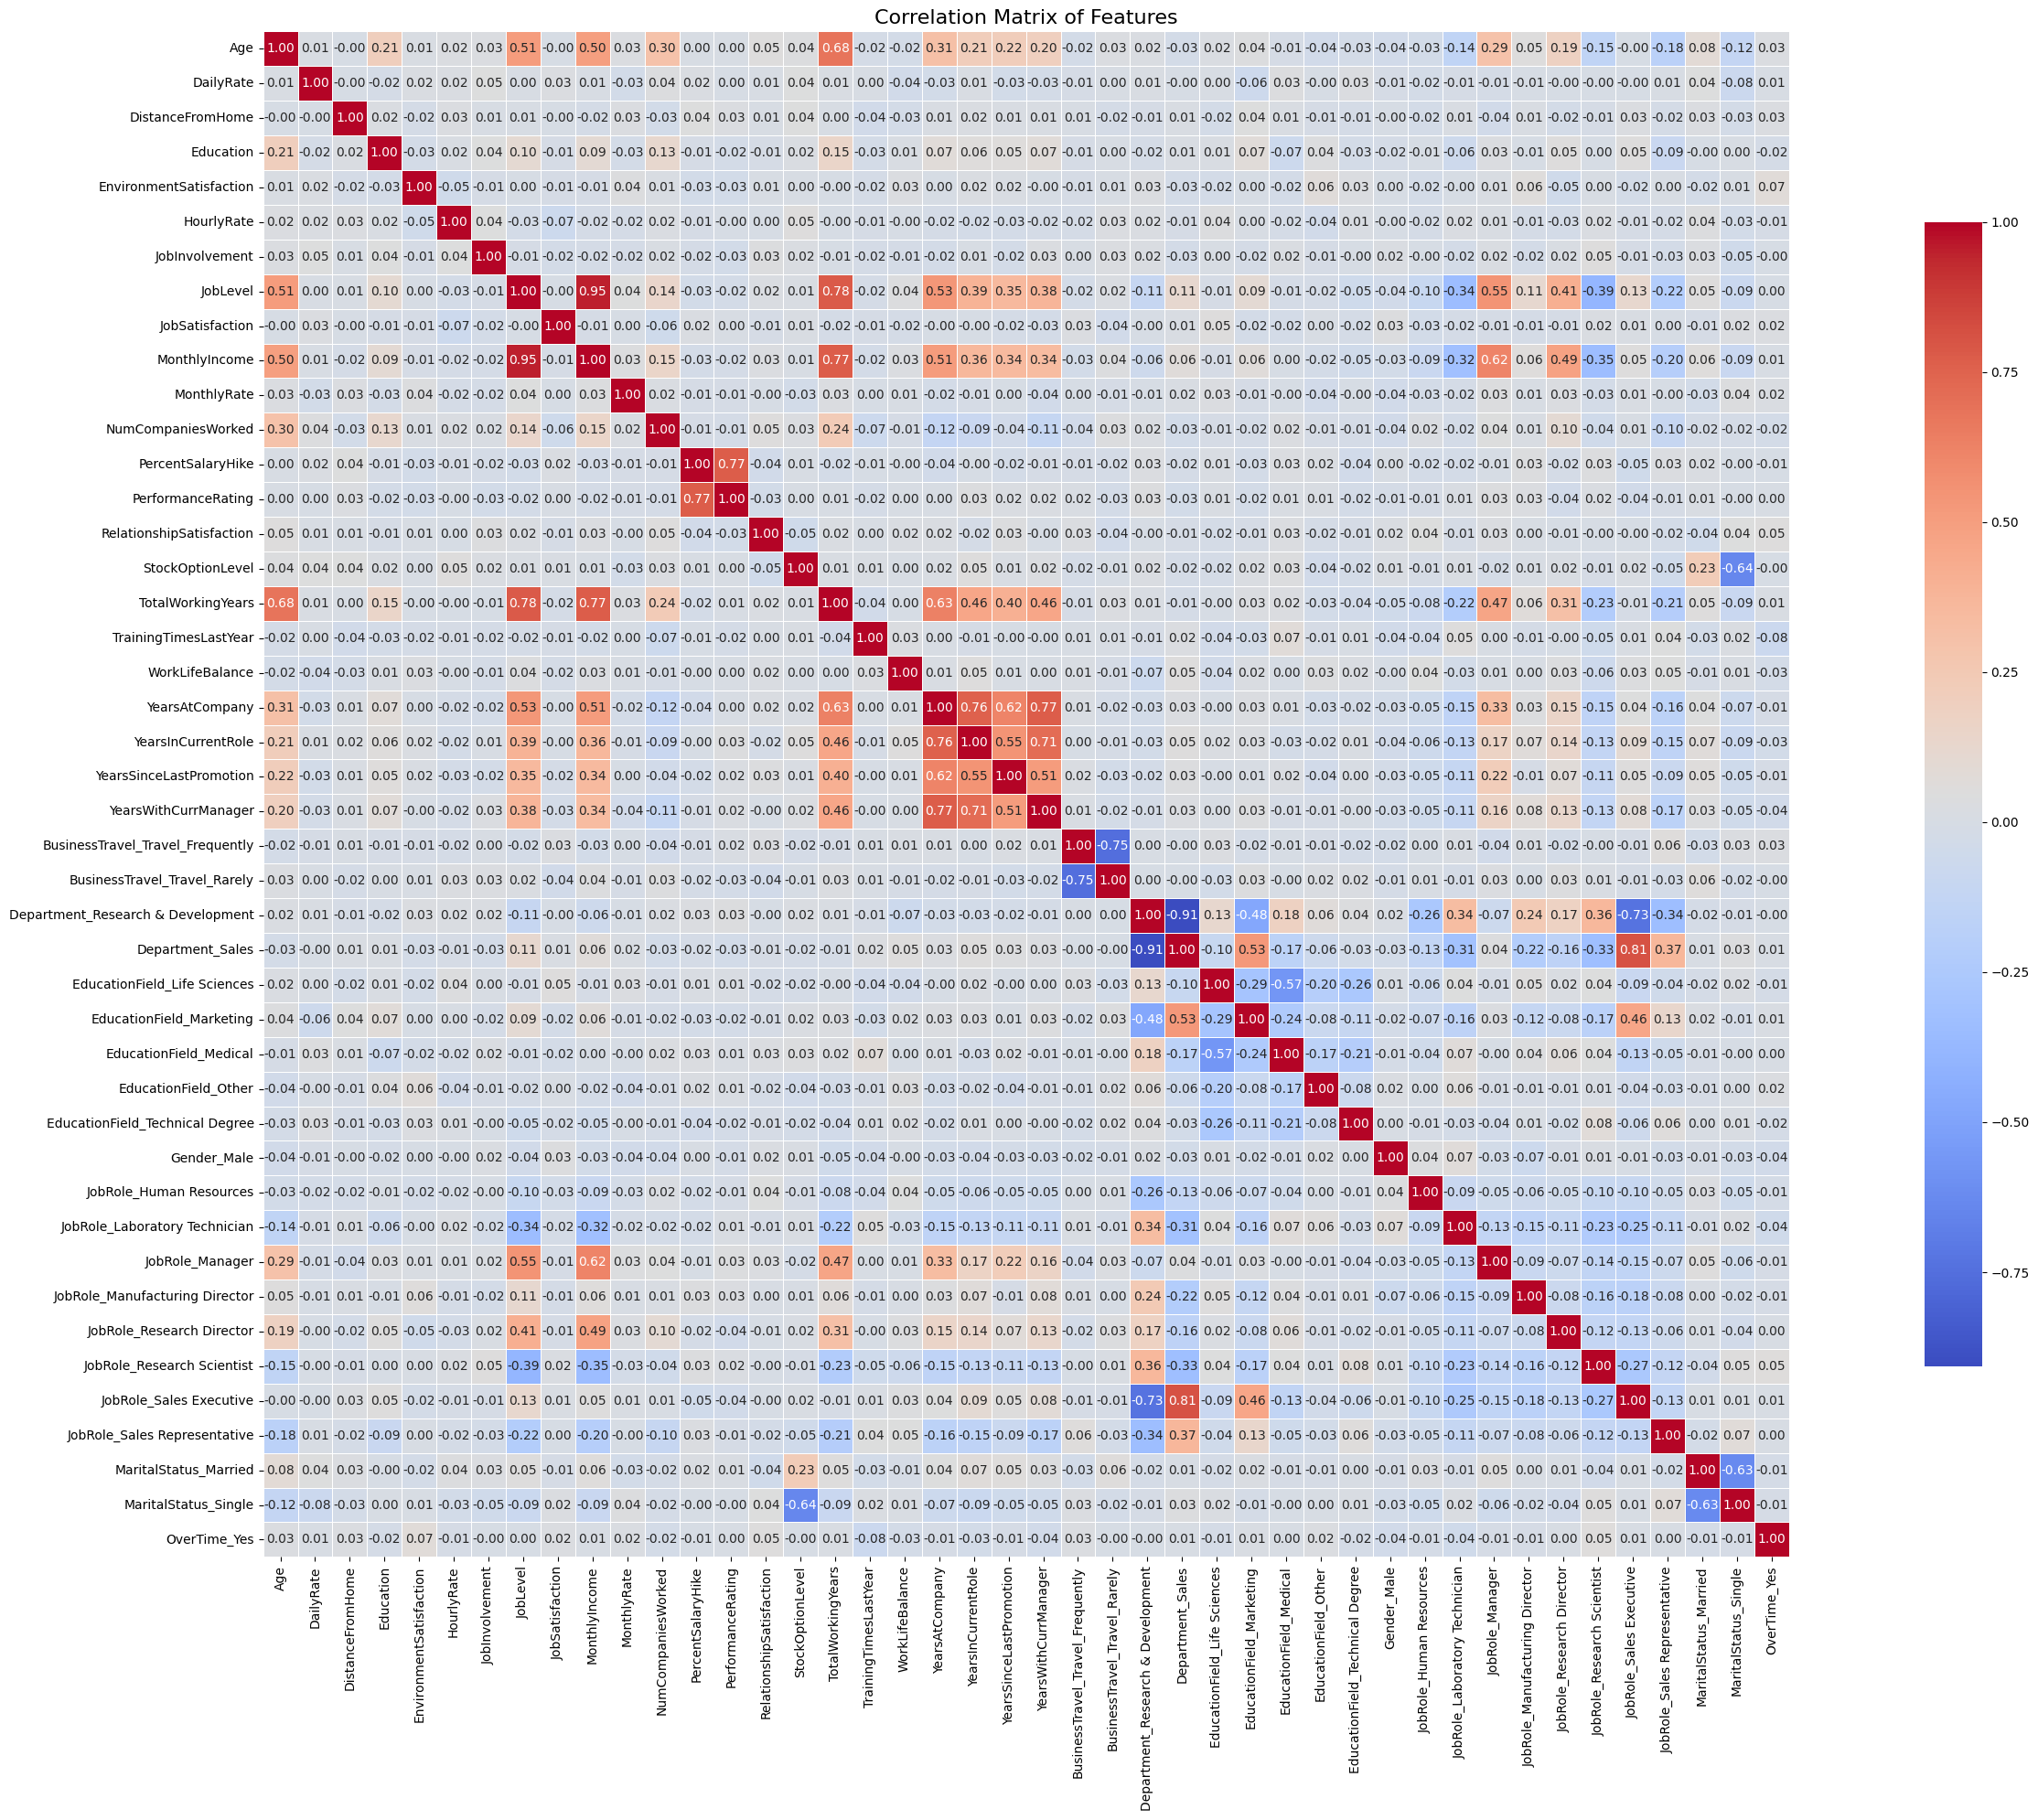

In [24]:
#Correlation Matrix
correlation_matrix = X.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True,
            cbar_kws={"shrink": .75}, linewidths=.5)
plt.title('Correlation Matrix of Features', fontsize=16)
plt.tight_layout()
plt.show()

In [25]:
X = X.drop(columns=['MonthlyIncome','TotalWorkingYears','YearsInCurrentRole','YearsWithCurrManager'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyRate                        1470 non-null   int64
 10  NumCompaniesWorked                 1470 non-null   int64
 11  PercentSalaryHike                  1470 non-null   int64
 12  PerformanceRating   

In [26]:
#Split the data into training/test
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#Balance data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Logistic Regression

In [28]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
logistic_model = LogisticRegression(solver='liblinear')
logistic_model.fit(X_train_resampled, y_train_resampled)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Accuracy (Logistic Regression):", accuracy)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix)
print("Classification Report (Logistic Regression):\n", class_report)

Accuracy (Logistic Regression): 0.8843537414965986
Confusion Matrix (Logistic Regression):
 [[242  13]
 [ 21  18]]
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.58      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.75      0.71      0.72       294
weighted avg       0.88      0.88      0.88       294



AUC-ROC Score: 0.8115635997988939


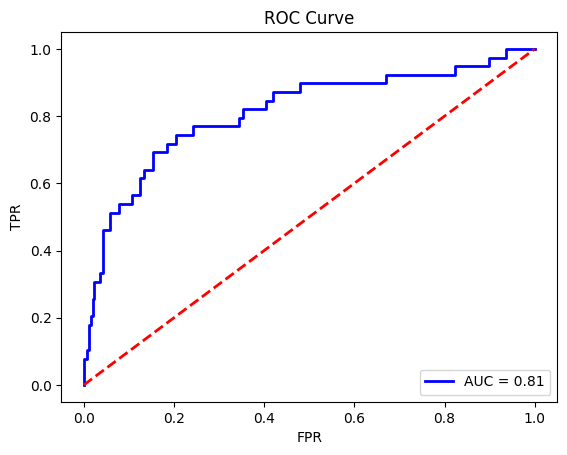

In [29]:
ypp = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, th = roc_curve(y_test, ypp)
auc = roc_auc_score(y_test, ypp)
lw = 2
print("AUC-ROC Score:", auc)
plt.plot(fpr, tpr, color='blue', lw=lw, label='AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=lw, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

The logistic regression model yielded an F1 score of 0.51 and an AUC of 0.81 using the balanced sample obtained using SMOTE.

In [30]:
# Logistic Regression with Hyperparameter Tuning (GridSearchCV)
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
}
#GridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000), param_grid_lr, cv=5, n_jobs=-1)
grid_search_lr.fit(X_train_resampled, y_train_resampled)
best_params_lr = grid_search_lr.best_params_
best_estimator_lr = grid_search_lr.best_estimator_
best_estimator_lr.fit(X_train_resampled, y_train_resampled)
y_pred_tuned_lr = best_estimator_lr.predict(X_test)
accuracy_tuned_lr = accuracy_score(y_test, y_pred_tuned_lr)
conf_matrix_tuned_lr = confusion_matrix(y_test, y_pred_tuned_lr)
class_report_tuned_lr = classification_report(y_test, y_pred_tuned_lr)
print("\nBest Parameters (Logistic Regression with Hyperparameter tuning):", best_params_lr)
print("Accuracy (Logistic Regression with Hyperparameter tuning):", accuracy_tuned_lr)
print("Confusion Matrix (Logistic Regression with Hyperparameter tuning):\n", conf_matrix_tuned_lr)
print("Classification Report (Logistic Regression with Hyperparameter tuning):\n", class_report_tuned_lr)


Best Parameters (Logistic Regression with Hyperparameter tuning): {'C': 10, 'penalty': 'l2'}
Accuracy (Logistic Regression with Hyperparameter tuning): 0.8877551020408163
Confusion Matrix (Logistic Regression with Hyperparameter tuning):
 [[243  12]
 [ 21  18]]
Classification Report (Logistic Regression with Hyperparameter tuning):
               precision    recall  f1-score   support

           0       0.92      0.95      0.94       255
           1       0.60      0.46      0.52        39

    accuracy                           0.89       294
   macro avg       0.76      0.71      0.73       294
weighted avg       0.88      0.89      0.88       294



AUC-ROC Score: 0.8123680241327301


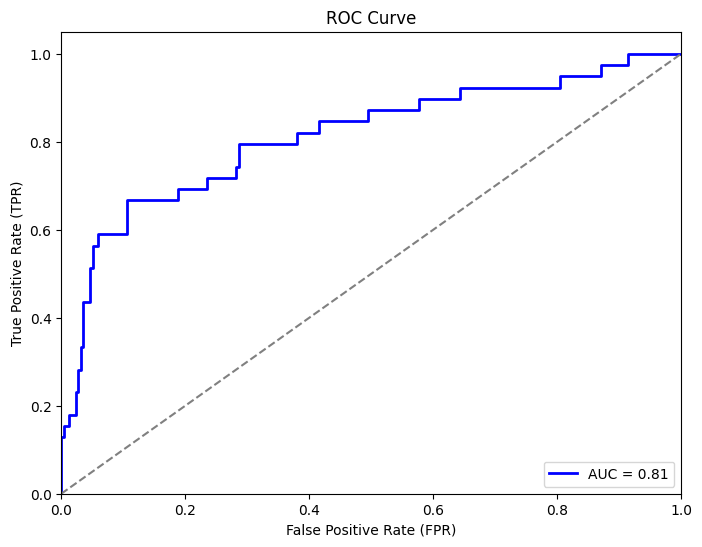

In [31]:
# Ploting ROC Curve for Logistics Regression with Hyperparameter tuning
y_prob_lr = best_estimator_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)
print("AUC-ROC Score:", roc_auc_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'AUC = {roc_auc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

It appears that the F1 score for Attrition is only little improved with the hyperparameter adjustment, going from 0.51 to 0.52 and the AUC from 0.811 to 0.812.

# Random Forest

In [32]:
# Random Forest along with Hyperparameter Tuning
from sklearn.ensemble import RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
# GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_resampled, y_train_resampled)
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_
best_estimator_rf.fit(X_train_resampled, y_train_resampled)

y_pred_tuned_rf = best_estimator_rf.predict(X_test)
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
conf_matrix_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)
class_report_tuned_rf = classification_report(y_test, y_pred_tuned_rf)
print("\nBest Parameters (Random Forest):", best_params_rf)
print("Accuracy (Random Forest with Hyperparameter tuning):", accuracy_tuned_rf)
print("Confusion Matrix (Random Forest with Hyperparameter tuning):\n", conf_matrix_tuned_rf)
print("Classification Report (Random Forest with Hyperparameter tuning):\n", class_report_tuned_rf)


Best Parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy (Random Forest with Hyperparameter tuning): 0.8809523809523809
Confusion Matrix (Random Forest with Hyperparameter tuning):
 [[249   6]
 [ 29  10]]
Classification Report (Random Forest with Hyperparameter tuning):
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       255
           1       0.62      0.26      0.36        39

    accuracy                           0.88       294
   macro avg       0.76      0.62      0.65       294
weighted avg       0.86      0.88      0.86       294



AUC-ROC Score (Random Forest): 0.7662141779788839


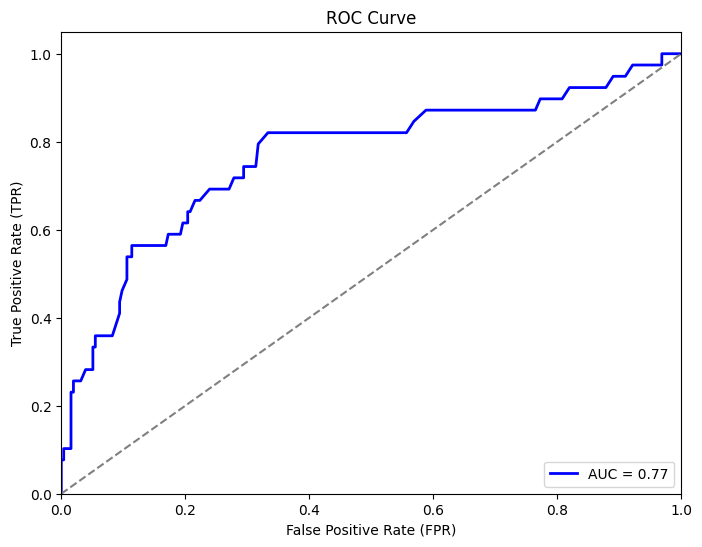

In [33]:
# Ploting ROC Curve for Random Forest
y_prob_rf = best_estimator_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("AUC-ROC Score (Random Forest):", roc_auc_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

With an F1 score of 0.36 for attrition and an AUC score of 0.77, the logistic regression model outperformed the hyperparameter-tuned Random Forest model.

# Gradient Boosting

In [34]:
# Gradient Boosting with Hyperparameter Tuning(GridSearchCV)
from sklearn.ensemble import GradientBoostingClassifier
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
#GridSearchCV
grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),param_grid=param_grid_gb,cv=5, n_jobs=-1)
grid_search_gb.fit(X_train_resampled, y_train_resampled)
best_params_gb = grid_search_gb.best_params_
best_estimator_gb = grid_search_gb.best_estimator_
best_estimator_gb.fit(X_train_resampled, y_train_resampled)

y_pred_tuned_gb = best_estimator_gb.predict(X_test)
accuracy_tuned_gb = accuracy_score(y_test, y_pred_tuned_gb)
conf_matrix_tuned_gb = confusion_matrix(y_test, y_pred_tuned_gb)
class_report_tuned_gb = classification_report(y_test, y_pred_tuned_gb)
print("\nBest Parameters (Gradient Boost):", best_params_gb)
print("Accuracy (Gradient Boost with Hyperparameter tuning):", accuracy_tuned_gb)
print("Confusion Matrix (Gradient Boosting with Hyperparameter tuning):\n", conf_matrix_tuned_gb)
print("Classification Report (Gradient Boosting with Hyperparameter tuning):\n", class_report_tuned_gb)


Best Parameters (Gradient Boost): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Accuracy (Gradient Boost with Hyperparameter tuning): 0.8707482993197279
Confusion Matrix (Gradient Boosting with Hyperparameter tuning):
 [[242  13]
 [ 25  14]]
Classification Report (Gradient Boosting with Hyperparameter tuning):
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.52      0.36      0.42        39

    accuracy                           0.87       294
   macro avg       0.71      0.65      0.68       294
weighted avg       0.85      0.87      0.86       294



AUC-ROC Score (Gradient Boosting): 0.7758672699849171


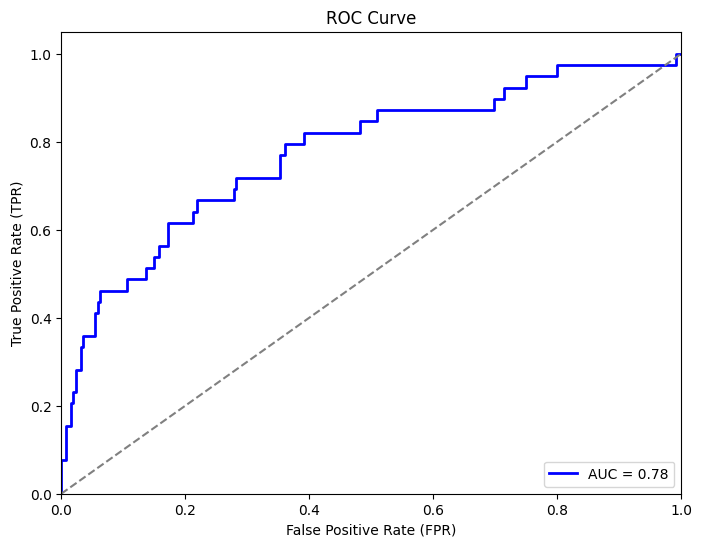

In [35]:
# Ploting ROC Curve for Gradient Boost
y_prob_gb = best_estimator_gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb)
print("AUC-ROC Score (Gradient Boosting):", roc_auc_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label=f'AUC = {roc_auc_gb:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

with an F1 score of 0.42 for attrition and an AUC score of 0.78, the logistic regression model outperformed the hyperparameter-tuned Gradient Boosting model. Nonetheless, it outperformed the Random Forest model, most likely as a result of the sequential learning technique.

# Results Analysis

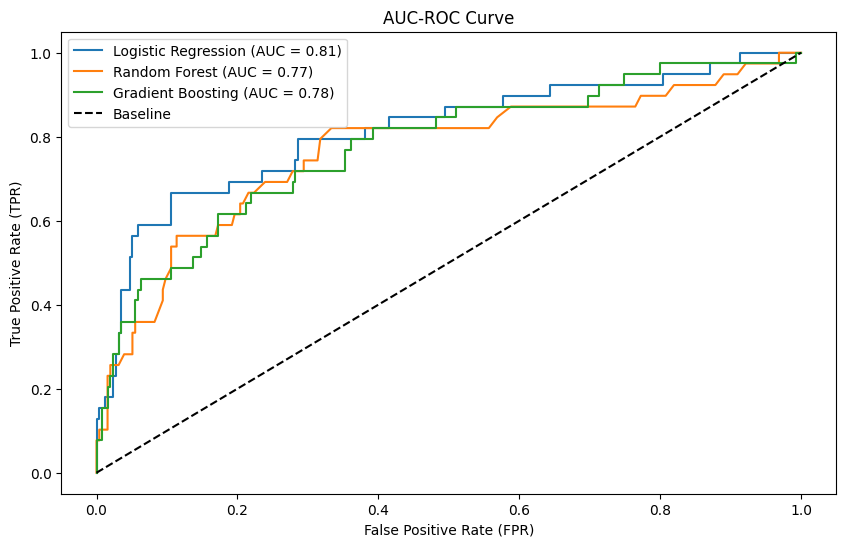

In [36]:
# ploting ROC Curve
models = [best_estimator_lr, best_estimator_rf, best_estimator_gb]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
plt.figure(figsize=(10, 6))
auc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
for model, name in zip(models, model_names): #ROC start
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    auc = roc_auc_score(y_test, y_prob)
    auc_scores.append(auc)

    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
plt.plot([0, 1], [0, 1], 'k--', label='Baseline') #Baseline
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AUC-ROC Curve')
plt.legend()
plt.show()

In [37]:
#Getting Results
metrics_df = pd.DataFrame({
    'Model': model_names,
    'AUC': auc_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})
print("\nModel Evaluation Metrics:")
print(metrics_df)


Model Evaluation Metrics:
                 Model       AUC  Precision    Recall  F1 Score
0  Logistic Regression  0.812368   0.600000  0.461538  0.521739
1        Random Forest  0.766214   0.625000  0.256410  0.363636
2    Gradient Boosting  0.775867   0.518519  0.358974  0.424242


# Feature Importantance

In [38]:
#Getting top 10 Features
coefficients_lr = best_estimator_lr.coef_[0]
importance_df_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_lr})
importance_df_lr = importance_df_lr.sort_values(by='Coefficient', ascending=False)
top_10_features_lr = importance_df_lr.head(10)
print(top_10_features_lr)

                             Feature  Coefficient
39                      OverTime_Yes     1.509276
12                 PerformanceRating     0.417478
19  BusinessTravel_Travel_Frequently     0.194502
10                NumCompaniesWorked     0.140618
18           YearsSinceLastPromotion     0.090782
28                       Gender_Male     0.071276
38              MaritalStatus_Single     0.048594
2                   DistanceFromHome     0.034816
5                         HourlyRate     0.003547
9                        MonthlyRate     0.000018


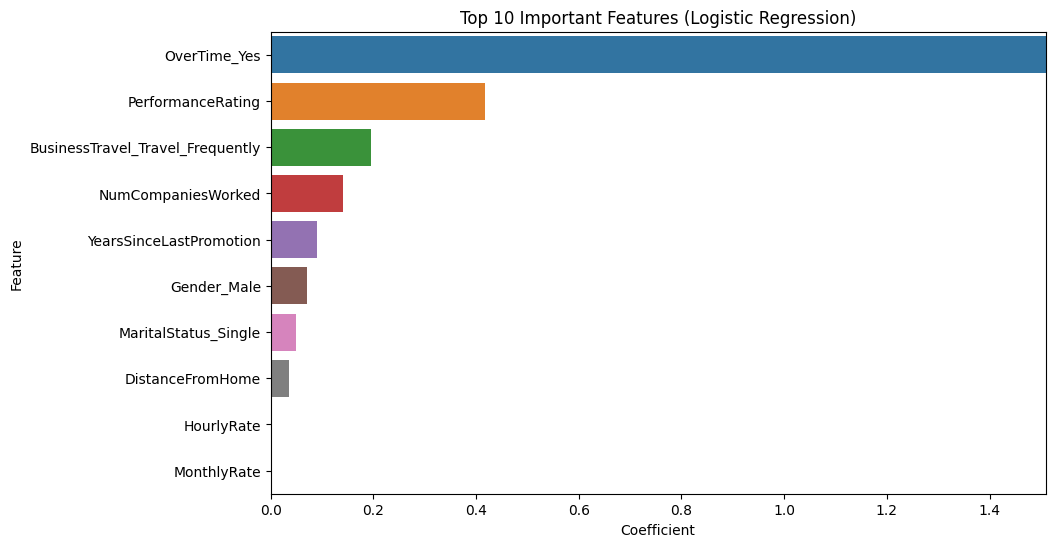

In [39]:
coefficients_lr = best_estimator_lr.coef_[0]
importance_df_lr = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_lr})
importance_df_lr = importance_df_lr.sort_values(by='Coefficient', ascending=False)
top_10_features_lr = importance_df_lr.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_10_features_lr)
plt.xlim(0, top_10_features_lr['Coefficient'].max())  # Set the x-axis limit from 0 to the maximum coefficient
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Important Features (Logistic Regression)')
plt.show()

# Conclusion

- When we consider all of the data together, we can see that the logistic regression model performed the best, with an F1 score of roughly 0.52 for Attrition['Yes'] and an AUC of 0.81. This result implies that Attrition and the features most likely have linear relationships, and that Attrition is less likely to be dependent on more complex or non-linear relationships with other features. The comparatively small/moderate sized dataset may have hindered the effectiveness of the Random Forest and Gradient Boosting techniques in this case. In order to properly utilize the potential of these two ensemble methods, it is likely that we will see higher predictive statistics when the dataset is larger. Their intricate model construction process may have contributed to overfitting problems in our situation given the small amount of data.

- We presented the top 10 features from the model for the attrition prediction because the logistic regression model was the best fit for our dataset. We have provided an explanation for each feature's potential causal relationship to attrition below. Because HourlyRate and MonthlyRate have a relatively tiny coefficient and little to no influence on Attrition in real-world scenarios compared to other attributes, we will likewise exclude them.